# N-gram Language model


In this milestone you will build a language model based on the corpus you prepared in milestone 1. 

In milestone 2, we will work on the following items:

* Calculating the probabilities of n-grams using Maximum Likelihood Estimation and the equation: 
$$p(token / prefix) = \frac{count(prefix + token)} {count(prefix)}  $$

* Creating a text generator function based on the n-gram model
* Generating text with temperature sampling


The goal is to have a language model that can generate text.


In the next milestone we will learn how to assess the quality of our langauge model and handle words not present in the original corpus.


# Loading the dataset

Let's import the library and load the dataset that we created in the previous task


In [30]:
import pandas as pd
import numpy as np
import re
import csv
from tqdm import tqdm
from collections import defaultdict, Counter
from nltk.util import ngrams
import pickle
import matplotlib.pyplot as plt
import random

In [32]:
# if there's a problem with the versions of the librairies, you can . . uncomment this line and install the proper versions

# !pip install -r requirements.txt

In [31]:
# Set some global parameters

# Displaying all columns when displaying dataframes
pd.options.display.max_columns = None

# We will work with trigrams 
ngrams_degree = 3


In [33]:
# Load data into pandas dataframe, shuffle it and reset the index


In [34]:
# Display the dimensions of the dataframe 

# And the 1st 5 lines


(789649, 7)

   post_id  parent_id  comment_id  \
0   161009        NaN    309845.0   
1   156252        NaN    298634.0   
2   423360        NaN    790161.0   
3   268623        NaN         NaN   
4   433662        NaN    808873.0   

                                                text category  \
0  I can't disclose the algorithm, but I can cert...  comment   
1  I plan to leave the answer to this question in...  comment   
2  Wait, I need to clarify how is Half-normal dis...  comment   
3  I am fitting several models of the form.. glm ...     post   
4  If you really want to calculate some p-value u...  comment   

                                              tokens  n_tokens  
0  i can ' t disclose the algorithm , but i can c...        40  
1  i plan to leave the answer to this question in...        84  
2  wait , i need to clarify how is half - normal ...        25  
3  i am fitting several models of the form .. glm...        82  
4  if you really want to calculate some p - valu

The tokens were saved as strings with space separated tokens for simplicity purposes. 

Let's transform the tokens colum as an actual list of tokens.

In [35]:
#Change tokens column back to a list of tokens from a space separated string


In [36]:
#Check 5 random token values


array([list(['do', 'you', 'see', 'any', 'obvious', 'relation', 'to', 'the', 'wald', '-', 'confidence', 'interval', '?']),
       list(['should', 'i', 'create', 'categories', '?', 'if', 'not', 'how', 'can', 'i', 'interpret', 'odds', 'ratio', 'while', 'there', 'is', 'no', 'reference', 'category', '?']),
       list(['experiment', 'design', 'process', 'outputs', 'the', 'order', 'in', 'which', 'to', 'do', 'the', 'work', 'assumption', 'ordering', 'of', 'work', 'items', 'is', 'most', 'preferred', 'valuable', 'by', 'stakeholders', 'work', 'items', 'the', 'process', 'above', 'produces', 'a', 'rank', 'ordering', 'of', 'items', '.', 'individual', 'teams', 'select', 'work', 'items', 'from', 'this', 'prioritized', 'queue', 'to', 'do', 'their', 'work', '.', 'i', 'introduced', 'a', 'new', 'process', 'to', 'perform', 'the', 'prioritization', 'and', 'we', 'did', 'notice', 'some', 'improvement', 'in', 'the', 'selection', 'of', 'work', 'items', 'i', '.', 'e', '.,', 'work', 'items', 'were', 'more', 'and'

We split the dataset into a training and a testing subset. 

The testing subset is composed of the titles, the train subset is composed of posts and comments


In [37]:
#Create train and test dataframes
#Training df is all posts and comments and testing df is all titles



In [38]:
# Display the dimensions of the training dataframe 

# and the 1st 5 lines

# Display the dimensions of the testing dataframe 

# and the 1st 5 lines



-- Training set: (705964, 7)

   post_id  parent_id  comment_id  \
0   161009        NaN    309845.0   
1   156252        NaN    298634.0   
2   423360        NaN    790161.0   
3   268623        NaN         NaN   
4   433662        NaN    808873.0   

                                                text category  \
0  I can't disclose the algorithm, but I can cert...  comment   
1  I plan to leave the answer to this question in...  comment   
2  Wait, I need to clarify how is Half-normal dis...  comment   
3  I am fitting several models of the form.. glm ...     post   
4  If you really want to calculate some p-value u...  comment   

                                              tokens  n_tokens  
0  [i, can, ', t, disclose, the, algorithm, ,, bu...        40  
1  [i, plan, to, leave, the, answer, to, this, qu...        84  
2  [wait, ,, i, need, to, clarify, how, is, half,...        25  
3  [i, am, fitting, several, models, of, the, for...        82  
4  [if, you, really, want, to, 

# Counting bigrams and following tokens
We build a counts object defined as a defaultdict(Counter). 

Taking into account all trigrams (ngrams_degree = 3) that we break into prefix (bigrams) followed by single tokens. 

The counts object will have the bigrams as keys and for each key a Counter of all the potential tokens. 

For instance, if the corpus contains a 100 instances of "*how many people*" and a 120 instances of "*how many times*" we would get the following entry:

    counts[('how', 'many')] = Counter('people': 100, 'times': 120, .... )

Similarly if the corpus contains "*the model is*" 500 times and "*the model parameters*" 200 times, we end up with:

    counts[('the', 'model')] = Counter('is': 500, 'parameters': 200, .... )

To split the tokens into bigramns we use the [ntlk.ngrams](https://www.nltk.org/api/nltk.html#nltk.util.ngrams) function:


    Return the ngrams generated from a sequence of items, as an iterator.
    For example:

    >>> from nltk.util import ngrams
    >>> list(ngrams([1,2,3,4,5], 3))
    [(1, 2, 3), (2, 3, 4), (3, 4, 5)]

The next cell should take a couple of minutes.

Note that we build the mode on the training subset df_train and leave the testing subset aside.




In [39]:
#Create a counts object by creating a defaultdict with a counter 
#This will be dictionary with a bigram for each key and a counter of potential tokens for each value

#Loop through all the tokens in training set
    
    #For each ngram

    
          #Set n = ngrams_degree = 3 in our case

          #Set pad right to true 
          
          #Set pad right to true

          #Set the left_pad_symbol = <s> 

          #Set right_pad_symbol = </s> 

            
        #Get the prefix bigram (beginning to 2nd last index)

        #Get the following token (last index)

        #Add 1 to the counts object with prefix as the key and token as the value


100%|██████████| 705964/705964 [05:54<00:00, 1989.42it/s] 


We can explore the counts object

In [40]:
#Check the number of bigrams
print("we have {} bigrams".format(len(counts.keys())))

we have 3332935 bigrams


In [41]:
#Print 5 random samples from counts object
for i in range(5):
    prefix = random.choice(list(counts.keys()))
    print("{}: \t{}".format(prefix,counts[prefix]))

('np', 'a'): 	Counter({'b': 3, ',': 1, 'p': 1, '-': 1, 'np': 1, '…': 1, 's': 1})
('fragments', 'regarding'): 	Counter({'the': 1})
('this', 'taske'): 	Counter({'while': 1})
('on', 'adjr'): 	Counter({'not': 1})
('possible', 'accuracy'): 	Counter({'.': 3, 'across': 1})


Let's look at the number of potential tokens for each bigram. 



In [42]:
#Loop through bigrams and get length of potential tokens 


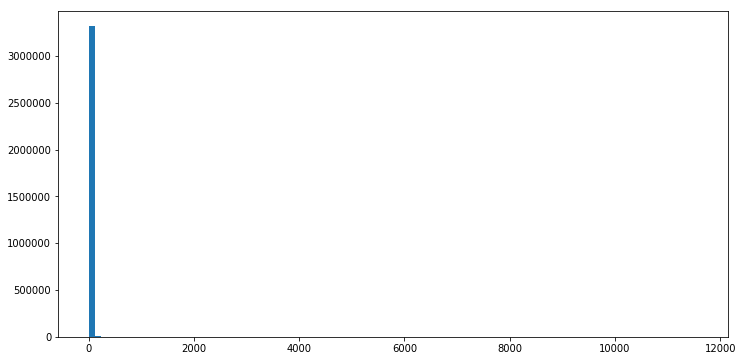

In [43]:
#Plot the distribution of the count of tokens



As we can see, most bigrams only have one potential following token. 


In [44]:
#Filter bigrams with exactly 1 potential following token

#Filter bigramswith exactly 2 potential following tokens


#Print the length of these filtered lists
#Number of bigrams with exactly 1 potential following token

#Number of bigrams with exactly 2 potential following token


2146242 bigrams_with_single_tokens
446829 bigrams_with_two_tokens


2 bigrams have over 10,000 potential tokens:

In [45]:
#Check any bigrams that have more than 10,000 potential tokens



{('<s>', '<s>'): 11564, ('of', 'the'): 10815}

Note: At this point we could decide to remove all the bigrams with a single potential token as not being significant. This would reduce the size of the model. We will see later on if that actually improves the model or degrades it.

# token / prefix probabilities

To obtain token / prefix probabilities using the Maximum Likelihood Estimator, we must simply normalize each (prefix - token) count by the total number of the prefix occurence. 

$$p(token / prefix) = \frac{count(prefix + token)} {count(prefix)}$$


Keeping the same defaultdict(Counter) structure for the freq object, we should obtain something similar to 


    freq[('how', 'many')] = {'people': 0.14, 'times': 120, .... }

with 
* p(people / how many) = c('how many people') / c('how many') 
* p(times / how many) = c('how many times') / c('how many')





In [18]:
#Create a freq object by creating a defaultdict with a dictionary 
#This will be dictionary with a bigram for each key and a dictionary of following token probabilities for each value


#Loop through prefix and tokens in counts


    #Get the total number of potential following tokens

    #Loop through all the potential following tokens  

    
        #Calculate token probability as count/total
        #Update freq onbject with prefix as the key and token probability as the value

        

Which gives us the following sample:

In [19]:
#Print 5 random samples from freq object




('works', 'great'): 	{'.': 0.32558139534883723, '!': 0.05813953488372093, 'on': 0.06976744186046512, 'for': 0.16279069767441862, ',': 0.1511627906976744, 'with': 0.06976744186046512, 'provided': 0.011627906976744186, '-': 0.011627906976744186, '</s>': 0.011627906976744186, 'only': 0.011627906976744186, 'if': 0.023255813953488372, 'less': 0.011627906976744186, 'and': 0.03488372093023256, 'glmnet': 0.011627906976744186, 'but': 0.011627906976744186, 'out': 0.023255813953488372}
('appended', 'bit'): 	{'was': 1.0}
('hiv', 'infection'): 	{'rate': 0.5, '.': 0.16666666666666666, 'by': 0.16666666666666666, 'or': 0.16666666666666666}
('assumption', 'mlr'): 	{'linearity': 1.0}
('added', 'uncorrelated'): 	{'controls': 1.0}


# Text generation

Next we write a text generating function which:
* takes a bigram as input
  * Note: In this version of the function, the bigram must exist in the corpus
* generates a new token by sampling the available tokens related to the bigram using the freq object as distribution 
* sliding the bigram to include the new token
* generating a new token based on the new bigram
* stopping when the text is N tokens long or the latest token is the end of string symbol



In [47]:
#Define a generate function that takes in an input string and a integer n_words for the length of the generated text


    #For the specified length
    
        #Get the prefix

        # no available text

        
            
        #Get all the potential tokens for this prefix as a list 
        #Since we stored the values also as a dictionary, this will just be the keys

        #Get all the corresponding probabilities for the potential tokens as a list
        #Since we stored the values also as a dictionary, this will just be the values

        #Randomly choose from the candidates, using the probabilities to define the distribution 
        #(Using numpy random.choice)

        
            
    #Return chosen token

    

Now let's have some fun with that language model.

You can choose any seed bigramns as long as it is present in the corpus. 

In [21]:
#Test out some different input texts and see what our function generates. The input must be present in the original 
#corpus for the function to work...we will learn how to deal with unseen words in the next milestone!

#Try the following inputs - 'the model', 'that distribution', 'to determine'




the model again , i need to aggregate and average across them ? </s>

that distribution . y , y bias ... also i have problem . given a data set however in that population ? </s>

to determine seasonality from data , calculating the confidence interval does not specify , one way to extract them from the statistics principles and practice of spatial correlations . </s>


# Temperature sampling

As you may have noticed, for some bigrams, one particular token may be much more frequent than the others potential tokens. 

For instance:

* ('building', 'machine'): 	{'learning': 0.875, 'classification': 0.125}

when generating the next token based on the bigram "*building machine*", most of the times the word "learning" will be chosen instead of "classification".

In order to compensate these imbalances and improve the chances of less frequent tokens to be chosen we can sample with temperature.

In order to increase the randomness of the next token selection given a prefix, we can flatten the distribution using the temperature $$\tau$$ to define a new probability distribution as such:

$$f_{\tau}(p_i) = \frac{ p_i^{\frac{1}{\tau}} }{ \sum_j p_j^{\frac{1}{\tau}} }$$

See [this post](https://stats.stackexchange.com/questions/255223/the-effect-of-temperature-in-temperature-sampling) for a more in-depth explanation on temperature sampling.




In [ ]:
#Copy over the generate function - we only need to modify the probabilites using the temperature definition
#New probabilites for each token. The rest of the function will be the same

#Define a generate function that takes in an input string, a temperature value 
#and a integer n_words for the length of the generated text
    
    #For the specified length

        #Get the prefix
        
        # no available text

        
            
        #Get all the potential tokens for this prefix as a list 
        #Since we stored the values also as a dictionary, this will just be the keys

        #Get all the corresponding probabilities for the potential tokens as a list
        #Since we stored the values also as a dictionary, this will just be the values

        
        #Modify distribution using temperature defintion
        #Calucluate denominator as the sum of each probability to the power of the input temperature

        #Calculate new probabilities as (probability to the power of temperatature)/denominator for each probability

        
        #Randomly choose from the candidates, using the probabilities to define the distribution 
        #(Using numpy random.choice)

        
            
    #Return chosen token

    

Let's generate some text with different values for the temperature.

The higher the temperature, the less chaotic (and shorter) the generated text will end up being.

In [23]:
#Test out some different temperatures (try 0.01, 0.5, 1, 3, 10) for the following input - 'the model',
#See how the generated text changes with the temperature


0.01
the model receives the second cumulant . interestingly this doesn ´ t the stark contrast in distances . however patients is pretty convincing to sample m , transition proportion , these three
0.5
the model conclusions will be notable . </s>
1
the model and data like text if word in each week , one card . if you standardize your variables out of the class probablity in the output from the mixing parameter
3
the model , and then see if there is no need to be a good fit for a given sample size , and i am not sure if i get a good
10
the model . </s>


# Export data and model
As in Milestone 1 we will export our test dataframe as csv after transforming the list of tokens into a space separated string.

We will also have to export the freq and counts object to use in the next milestone. For these objects, we will have to export them as pickled files.

In [26]:
#Write test dataframe to output csv


In [25]:

#Save freq object as pickled file



#Save counts object as pickled file


